In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib

import cartopy as cart

import cartopy.crs as ccrs
import cmocean.cm as cmo
import seaborn as sns
from glob import glob
import cartopy.feature as cfeature
import pandas as pd

from scipy import stats
import matplotlib.cm as cm

import random

In [2]:
moi_bathy = xr.load_dataset("/storage/shared/oceanparcels/input_data/MOi/domain_ORCA0083-N006/bathymetry_ORCA12_V3.3.nc")

In [3]:
lat_obs = -32.171
lon_obs = 6.287

lon_rest = abs(moi_bathy['nav_lon'][0,:] - lon_obs)
lat_rest = abs(moi_bathy['nav_lat'][:,0] - lat_obs)
lon_index = np.where(lon_rest == lon_rest.min())[0][0]
lat_index = np.where(lat_rest == lat_rest.min())[0][0]

In [4]:
sim = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/set_16/set16_500.zarr')

In [5]:
f, g = np.where(sim['lon'].values > 12)
f = np.unique(f)
bound_index = []
for i in range(500):
    if i not in f:
        bound_index.append(i)

In [6]:
bound_index

[6,
 13,
 38,
 66,
 71,
 85,
 168,
 180,
 194,
 198,
 205,
 215,
 222,
 224,
 237,
 364,
 366,
 390,
 396,
 398,
 440,
 441,
 451,
 464,
 474,
 478,
 484]

In [11]:
i=bound_index[4]
ranges_diam = []
j_diam = []
diams = []
j = 0

for ll in range(0, 6):
    dj = sim['diameter'][i, j+1]
    diams.append(dj.values)
    k = np.where(sim['diameter'][i, :]==dj)[0][-1]

    ranges_diam.append(range(j,k))
    j_diam.append(k)
    j = k
diams = np.array(diams)
# dj = sim['diameter'][i, j]
# k = np.where(sim['diameter'][i, :]==dj)[0][-1]
# ranges_diam.append(range(j,k))

In [12]:
diams

array([5.05313488e-08, 4.04250790e-07, 8.08501581e-07, 3.23400632e-06,
       1.29360253e-05, 2.58720506e-05])

/tmp/ipykernel_266170/1693937078.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', '$\ -5000 m$', '$\ -4000 m$', '$\ -3000 m$', '$\ -2000 m$', '$\ -1000 m$', '$\quad 0 m$'])


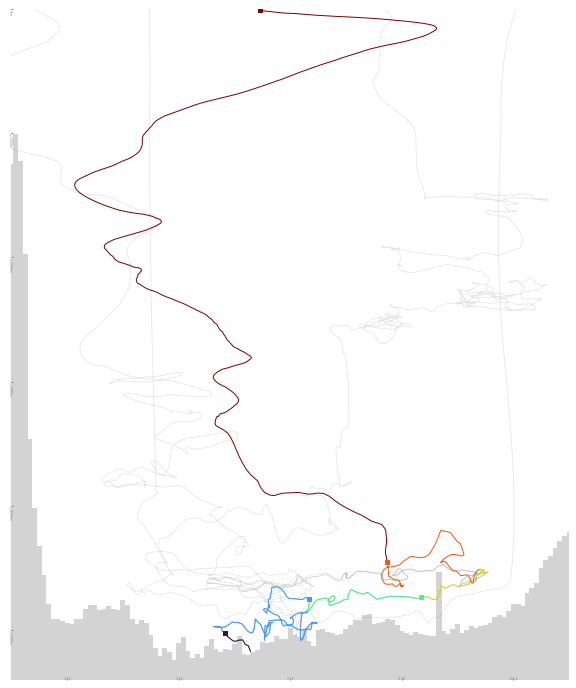

In [63]:
colormap='turbo'
x_colors = np.linspace(0, 1, 6)
colors = cm.get_cmap(colormap)(x_colors)

lon_range = range(lon_index-55,lon_index+70)

fig, ax = plt.subplots(figsize=(10, 10*(np.sqrt(2)-0.18)))

# for i in bound_index[]:
# i=bound_index[5]

# for p in range(20):
#     i=bound_index[p]
#     ax.plot(sim['lon'][i, :], -sim['z'][i, :], alpha=1, linewidth=1.8, label=p);
    
i=bound_index[17]
ax.plot(sim['lon'][i, :], -sim['z'][i, :], alpha=0.1, color='k', linewidth=0.8);
i=bound_index[2]
ax.plot(sim['lon'][i, :], -sim['z'][i, :], alpha=0.1, color='k', linewidth=0.8);
i=bound_index[11]
ax.plot(sim['lon'][i, :], -sim['z'][i, :], alpha=0.1, color='k', linewidth=0.8);
i=bound_index[18]
ax.plot(sim['lon'][i, :], -sim['z'][i, :], alpha=0.1, color='k', linewidth=0.8);
    
# ax.plot(sim['lon'][i, :], -sim['z'][i, :], alpha=1, linewidth=0.8, label=i);
# plt.legend()
i = bound_index[4]

for l in range(6):
    ax.plot(sim['lon'][i, ranges_diam[l]], -sim['z'][i, ranges_diam[l]], alpha=1, linewidth=1, color= colors[l]);
    ax.scatter(sim['lon'][i, j_diam[l]], -sim['z'][i, j_diam[l]],color= colors[l], zorder=3, marker='s', s= 10)
    
ax.bar(moi_bathy['nav_lon'][lat_index+1, lon_range], 5500 - moi_bathy['Bathymetry'][lat_index+1, lon_range]- 50, 
       bottom=-5500, color='lightgrey', width=0.09)

ax.set_xlim(2, 12)
ax.set_ylim(-5400, 0)
# ax.axis('off')
ax.tick_params(bottom=True, left=True)
spines = ["top","right","left", "bottom"]
for s in spines:
    ax.spines[s].set_visible(False)

ax.set_xticks([3,5,7,9,11])
ax.set_xticklabels(['$\ 3\degree$ E','$\quad 5\degree$ E','$\ 7\degree$ E','$\ 9\degree$ E','$\ 11\degree$ E'])
ax.set_yticklabels(['', '$\ -5000 m$', '$\ -4000 m$', '$\ -3000 m$', '$\ -2000 m$', '$\ -1000 m$', '$\quad 0 m$'])

ax.tick_params(axis="x",direction="in", pad=-6, colors='grey', length=2, width=1, labelsize=3)
ax.tick_params(axis="y",direction="in", pad=-3, colors='grey', length=2, width=1, labelrotation=-90, labelsize=3)

plt.savefig('../figs/poster_bckgrnd.pdf', facecolor=(0,0,0,0))
plt.savefig('../figs/poster_bckgrnd.png', facecolor=(0,0,0,0))

In [97]:
labels_sizes=[]

for l in range(3):
    s = f'{(diams[l]/1e-9):0.2f}nm'
    labels_sizes.append(s)
    
for l in range(3,6):
    s = f'{(diams[l]/1e-6):0.2f} '
    labels_sizes.append(s)

In [98]:
labels_sizes

['50.53nm', '404.25nm', '808.50nm', '3.23 ', '12.94 ', '25.87 ']

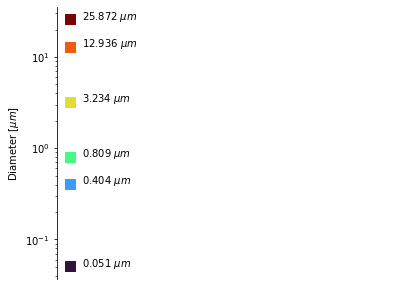

In [65]:
fig, ax = plt.subplots(figsize=(6,5))

colormap='turbo'
x_colors = np.linspace(0, 1, 6)
colors = cm.get_cmap(colormap)(x_colors)

for l in range(6):
#     plt.plot(sim['lon'][i, ranges_diam[l]], -sim['z'][i, ranges_diam[l]], alpha=1, linewidth=0.8, color= colors[l]);
    ax.scatter(0.955, diams[l]/1e-6, color= colors[l], zorder=3, marker='s', s= 100)
    ax.text(0.96, diams[l]/1e-6, f'${(diams[l]/1e-6):0.3f} \ \mu m$')
# plt.scatter(np.ones_like(diams), diams, marker='s')
ax.set_xlim(0.95,1.08)
ax.set_ylabel('Diameter [$\mu m$]')
ax.semilogy()

ax.tick_params(axis='x', which='both', bottom=False, top=False,labelbottom=False)

spines = ["top","right","bottom"]

for s in spines:
    ax.spines[s].set_visible(False)

plt.savefig('../figs/poster_bckgrnd_scale.png', dpi=200, facecolor=(0,0,0,0))

In [46]:
# this is pretty useless. Just copy the chunk of code below and adjust parameters.

def load_bathy(data_path):
    shp_dict = {}
    files = glob(data_path + '*.shp')
    assert len(files) > 0
    files.sort()
    for f in files:
        depth = f.split('_')[-1].split('.')[0]
        nei = cart.io.shapereader.Reader(f)
        shp_dict[depth] = nei
    
    depths = [d for d in shp_dict.keys()][::-1]
    colors = sns.mpl_palette('cmo.ice_r',n_colors=8)
    cmap = sns.mpl_palette('cmo.ice',n_colors=8,as_cmap=True)
        
    return shp_dict, depths, colors, cmap

In [60]:
shp_dict = {}
files = glob('../data/ne_10m_bathymetry_all/*.shp')
assert len(files) > 0
files.sort()
for f in files:
    depth = f.split('_')[-1].split('.')[0]
    # depth = '-' + f.split('_')[-1].split('.')[0]
    # depths.append(depth)
    nei = cart.io.shapereader.Reader(f)
    shp_dict[depth] = nei

depths = [d for d in shp_dict.keys()][::-1]
depth_colors = sns.mpl_palette('cmo.ice_r',n_colors=8)
cmap   = sns.mpl_palette('cmo.ice',n_colors=8,as_cmap=True)

/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


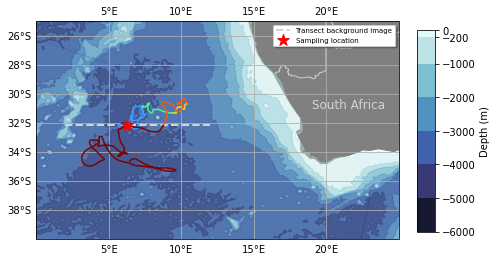

In [64]:
fig = plt.figure(figsize=(10,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((0, 25, -40, -25), crs=ccrs.PlateCarree())

i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(), crs=ccrs.PlateCarree(), color=depth_colors[i], alpha=0.4)
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)
ax.add_feature(cart.feature.BORDERS, color='lightgrey')
ax.text(19, -31, 'South Africa', color='lightgrey', size=12, rotation=0)

# ax.axhline(-32.170, -1, 0, color='k', zorder= 10)

ax.plot([2,12], [-32.170]*2, zorder=2, color='lightgrey', linestyle='--', lw=2, label='Transect background image')
ax.scatter(6.287, -32.170, zorder=3, marker='*', color='red', s=150, label='Sampling location')

ax.legend(shadow=True, fontsize=7)
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

i = bound_index[4]

for l in range(6):
    ax.plot(sim['lon'][i, ranges_diam[l]], sim['lat'][i, ranges_diam[l]], alpha=1, linewidth=1.5, color=colors[l]);
#     ax.scatter(sim['lon'][i, j_diam[l]], sim['lat'][i, j_diam[l]],color= colors[l], zorder=3, marker='s', s= 10)


axi = fig.add_axes([0.79,0.15,0.025,0.7])

norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)')

plt.savefig('../figs/sampling_location.png', dpi=200)
